In [1]:
#Potential Customer Yield Calculation by Rule Based Classification

In [ ]:
#Problem
"""A game company wants to create level-based new customer definitions (personas) by using some features of
its customers, and to create segments according to these new customer definitions and to estimate how much
the company can earn on average from new customers based on these segments."""

"""For example: The company wants to determine how much a 25-year-old male user from Turkey, who is an IOS user, can earn on average to the company."""

In [ ]:
#Dataset
"""
Persona.csv data set contains the prices of the products sold by an international game company and some demographic
information of the users who buy these products. The data set consists of records created in each sales transaction.
This means that the table is not singularized. In other words, a user with certain demographic characteristics may
have made more than one purchase.

Price: Customer's Spending Amount
Source: Customer's Device
Sex: Customer's Gender
Country: Customer's Country
Age: Customer's Age
"""

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("persona.csv", encoding='utf-8')

In [6]:
def quick_info(dataframe):
    print("--------- HEAD ---------")
    print(dataframe.head(10))
    print("--------- SHAPE ---------")
    print(dataframe.shape)
    print("--------- COLUMNS ---------")
    print(dataframe.columns)
    print("--------- DESRIBE ---------")
    print(dataframe.describe().T)
    print("--------- INFO ---------")
    print(dataframe.info())
    print("--------- ANY NULL VALUES ---------")
    print(dataframe.isnull().values.any())
    print("--------- SUM OF NULL VALUES ---------")
    print(dataframe.isnull().sum())

quick_info(df)

--------- HEAD ---------
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
5     29  android  male     bra   17
6     19  android  male     bra   17
7     59  android  male     bra   17
8     49  android  male     bra   17
9     19  android  male     bra   17
--------- SHAPE ---------
(5000, 5)
--------- COLUMNS ---------
Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')
--------- DESRIBE ---------
        count     mean        std   min   25%   50%   75%   max
PRICE  5000.0  34.1320  12.464897   9.0  29.0  39.0  39.0  59.0
AGE    5000.0  23.5814   8.995908  15.0  17.0  21.0  27.0  66.0
--------- INFO ---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE 

In [6]:
def dataframe_summary(dataframe, cat_threshold = 5, card_threshold=15):
    #Categorical Variables
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object"]] #['SOURCE', 'SEX', 'COUNTRY']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and dataframe[col].dtypes in ["int"]] #['PRICE']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > card_threshold and str(dataframe[col].dtypes) in ["object"]] #[]
    cat_cols = cat_cols + num_but_cat #['SOURCE', 'SEX', 'COUNTRY', 'PRICE']
    cat_cols = [col for col in cat_cols if col not in cat_but_car] #['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

    #Numerical Variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['int']] #['PRICE', 'AGE']
    num_cols = [col for col in num_cols if col not in cat_cols] #['AGE']

    print(f"Observations: {dataframe.shape[0]}\n",
          f"Variables: {dataframe.shape[1]}\n",
          f'cat_cols: {len(cat_cols)}\n',
          f'num_cols: {len(num_cols)}\n',
          f'cat_but_car: {len(cat_but_car)}\n',
          f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols

cat_cols, num_cols = dataframe_summary(dataframe=df)

Observations: 5000
 Variables: 5
 cat_cols: 3
 num_cols: 2
 cat_but_car: 0
 num_but_cat: 0


In [8]:
#Defined to get summary of categorical variables
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.grid()
        plt.show()

#Defined to get summary of numerical variables
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0, .25, .50, .75 ,1.]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52


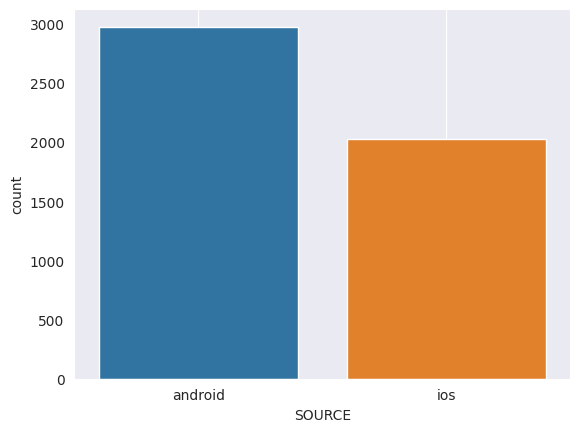

         SEX  Ratio
female  2621  52.42
male    2379  47.58


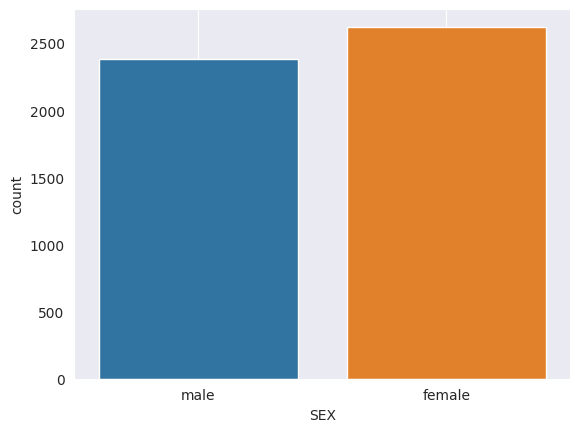

     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60


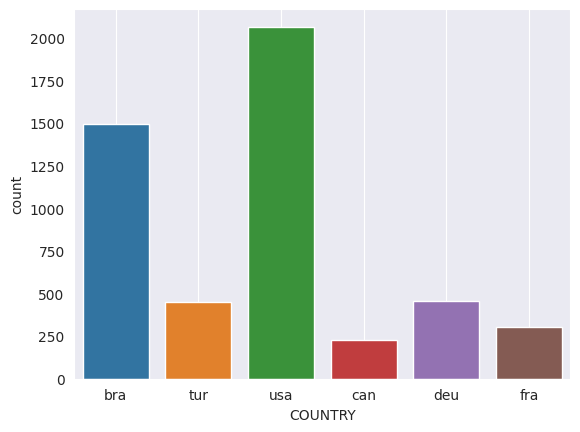

In [9]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

count    5000.000000
mean       34.132000
std        12.464897
min         9.000000
0%          9.000000
25%        29.000000
50%        39.000000
75%        39.000000
100%       59.000000
max        59.000000
Name: PRICE, dtype: float64


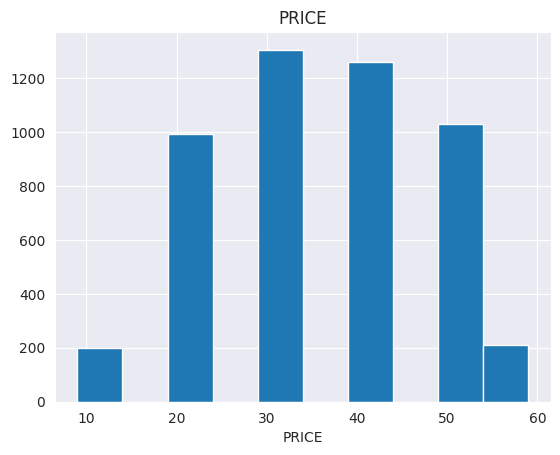

count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
0%         15.000000
25%        17.000000
50%        21.000000
75%        27.000000
100%       66.000000
max        66.000000
Name: AGE, dtype: float64


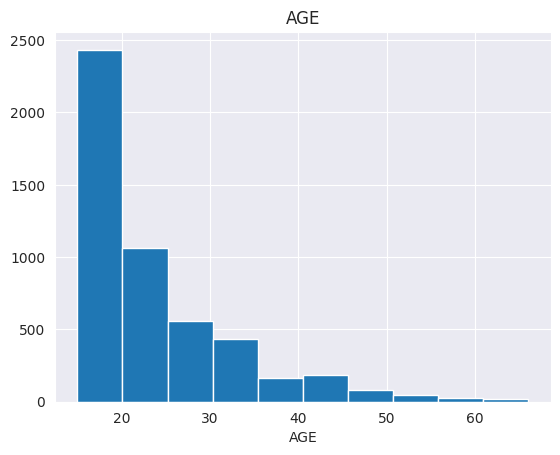

In [10]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [11]:
#Return average earnings in terms of break down of COUNTRY, SOURCE, SEX, AGE in descending order
agg_df = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":'mean'}).sort_values('PRICE',ascending=False)

In [12]:
#Convert index names to variable names by resetting index
agg_df.reset_index(inplace=True)

In [13]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


In [14]:
#Set intervals of AGE variable to be splitted
bins = [agg_df["AGE"].min(), 18, 23, 30, 40, agg_df["AGE"].max()]

#Set labels to correspond to splitted parts
labels = [str(agg_df["AGE"].min()) + '_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]

#Split AGE variable according to bins & Assign it to a new column in agg_df named "AGE_CAT"
#inclue_lowest made the first interval be left inclusive which allowed us to get the minimum value (which is 15)
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], bins=bins, labels=labels, include_lowest=True)

In [15]:
"""
NOTE: This code snippet returns min, max values according to grouped 'AGE_CAT' and useful
for giving consistent intervals on both cut & qcut. (in terms of labelling)
"""
agg_df.groupby("AGE_CAT").agg({"AGE":['min','max']})

AGE    
        min max
AGE_CAT        
15_18    15  18
19_23    19  23
24_30    24  30
31_40    31  40
41_66    41  66

In [16]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,15_18


In [17]:
#Requested to define new level based customers and add them as variables to the dataset.

#Defined a new variable called 'CUSTOMER_LEVEL_BASED' & Assigned as a variable to the dataset (agg_df) under the name "CUSTOMER_LEVEL_BASED"
#["COUNTRY","SOURCE","SEX","AGE_CAT"] columns are combined with "_" by column axis by lambda function
agg_df['CUSTOMER_LEVEL_BASED'] = agg_df[["COUNTRY","SOURCE","SEX","AGE_CAT"]].apply(lambda x: "_".join(x.astype(str)), axis=1)

#Since it has been said before that this dataset is not singularized, we need to singularize it.
agg_df = agg_df.groupby("CUSTOMER_LEVEL_BASED").agg({"PRICE":'mean'})

agg_df.reset_index(inplace=True) #We had to reset index since we merged different columns into one (i.e. 'Singularization process')

In [18]:
agg_df["CUSTOMER_LEVEL_BASED"].value_counts() #Proves that singularization process was successful

bra_android_female_15_18    1
tur_android_female_15_18    1
tur_ios_female_19_23        1
tur_ios_female_15_18        1
tur_android_male_41_66      1
                           ..
can_ios_male_41_66          1
can_ios_male_31_40          1
can_ios_male_24_30          1
can_ios_male_15_18          1
usa_ios_male_41_66          1
Name: CUSTOMER_LEVEL_BASED, Length: 109, dtype: int64

In [19]:
agg_df

,CUSTOMER_LEVEL_BASED,PRICE
0,bra_android_female_15_18,35.645303
1,bra_android_female_19_23,34.077340
2,bra_android_female_24_30,33.863946
3,bra_android_female_31_40,34.898326
4,bra_android_female_41_66,36.737179
...,...,...
104,usa_ios_male_15_18,33.983495
105,usa_ios_male_19_23,34.901872
106,usa_ios_male_24_30,34.838143
107,usa_ios_male_31_40,36.206324


In [20]:
#Requested to split new customers into "SEGMENTS" according to "PRICE" & Assign to agg_df with a new column named "SEGMENTS"

labels = ['A', "B", 'C', "D", 'E']

#NOTE: qcut creates unequal size bins but frequency of samples is equal in each bin
agg_df["SEGMENT"] = pd.qcut(agg_df['PRICE'], 5, labels=labels[::-1])

In [21]:
agg_df.sort_values(by="PRICE", ascending=False) #Indicates that the 'SEGMENT' distribution is made according to the 'PRICE' distribution.

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
54,fra_android_female_24_30,45.428571,A
86,tur_ios_male_24_30,45.000000,A
87,tur_ios_male_31_40,42.333333,A
72,tur_android_female_31_40,41.833333,A
25,can_android_male_19_23,40.111111,A
...,...,...,...
88,tur_ios_male_41_66,25.052632,E
85,tur_ios_male_19_23,24.833333,E
56,fra_android_male_15_18,24.625000,E
22,can_android_female_24_30,19.000000,E


In [22]:
#Requested to classify the new customers and estimate how much income they can bring to the company

def predict_income(country,device,sex,age):
    """
    This function takes 4 parameters about the customer to be searched, respectively, country, device, gender and age.
    Next, first of all iterates over "CUSTOMER_LEVEL_BASED" to unpack, and second of all iterates over it again to
    access each element of the "CUSTOMER_LEVEL_BASED" column. Then, selects every row based on its index and splits
    with underscore in the text. Since age intervals indices are known, they were called according to their indices and
    assigned to min_age, max_age respectively.

    After that, query control made with age parameters and if it is satisfied, combines each given element, performs requested
    query and returns prediction of the given user.

    Parameters
    ----------
    country: origin of the customer
    device: customer's device
    sex: customer's gender
    age: customer's age

    Returns
    -------
    new_customer: prediction of the given user

    Note
    ----
    It is possible to do more checks before querying the input (For example, it could be extended by checking whether all entries given in the dataset are valid)
    """
    for _ in agg_df["CUSTOMER_LEVEL_BASED"]:
        for ind, line in enumerate(agg_df["CUSTOMER_LEVEL_BASED"]):
            min_age = agg_df['CUSTOMER_LEVEL_BASED'][ind].split('_')[3]
            max_age = agg_df['CUSTOMER_LEVEL_BASED'][ind].split('_')[4]

            if min_age <= age <= max_age:
                new_customer = '_'.join([country.lower(), device.lower(), sex.lower(), min_age, max_age])

                return agg_df[agg_df['CUSTOMER_LEVEL_BASED'] == new_customer]

In [23]:
#Which segment does a 33-year-old Turkish female using ANDROID belong to and how much income is expected to earn on average?
predict_income("tur",'ios','female', '33')

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
82,tur_ios_female_31_40,32.333333,D


In [24]:
#Which segment does a 35-year-old French female using IOS belong to and how much income is expected to earn on average?
predict_income("fra",'ios','female', '35')

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
63,fra_ios_female_31_40,32.818182,D


In [25]:
#Which segment does a 20-year-old American male using IOS belong to and how much income is expected to earn on average?
predict_income("usa",'ios','male', '20')

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
105,usa_ios_male_19_23,34.901872,B


In [26]:
#Which segment does a 55-year-old Canadian male using ANDROID belong to and how much income is expected to earn on average?
predict_income("can",'android','male', '50')

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
27,can_android_male_41_66,37.571429,A
